In [1]:
# In this assignment students need to predict whether a person makes over
# 50K per year or not from classic adult dataset using XGBoost. The
# description of the dataset is as follows:

# Data Set Information:

# Extraction was done by Barry Becker from the 1994 Census
# database. A set of reasonably clean records was extracted using the
# following conditions: ((AAGE>16) && (AGI>100) &&
# (AFNLWGT>1)&& (HRSWK>0))

# Attribute Information:
# Listing of attributes: >50K, <=50K.
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
# Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
# Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
# Doctorate, 5th-6th, Preschool.
# education-num: continuous.

# marital-status: Married-civ-spouse, Divorced, Never-married,
# Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
# managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

# Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
# Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
# Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico,
# Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
# Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
# Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
# Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

# Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
# Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Following is the code to load required libraries and data:




In [2]:
# import numpy as np
# import pandas as pd

# train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-
# learning-databases/adult/adult.dat a', header = None)

# test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-
# databases/adult/adult.test' , skiprows = 1, header = None)

# col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
# 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',
# 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

# train_set.columns = col_labels
# test_set.columns = col_labels


In [3]:
# importing necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=col_labels, header = None)

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',names=col_labels, skiprows = 1, header = None)

In [8]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Exploratory data analysis

In [9]:
train_set.isnull().sum()
# no missing values are there

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

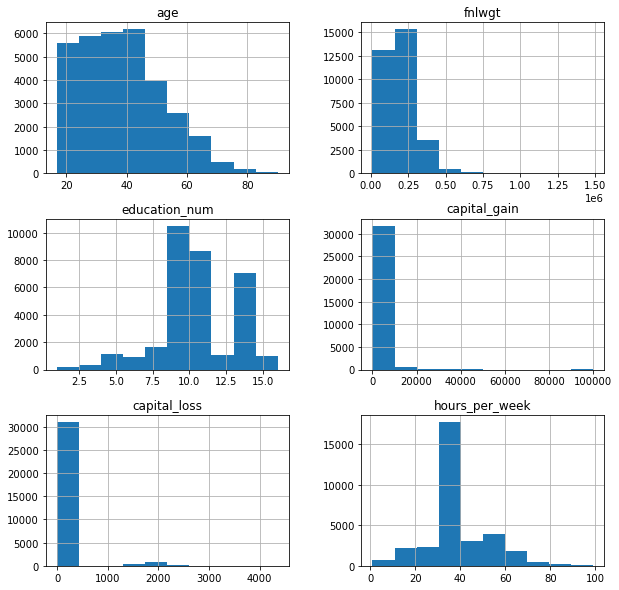

In [10]:
train_set.hist(figsize=(10,10))
plt.show()

In [11]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

To check uniqe values and count of them in each columns having type as object

In [12]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [13]:
train_set.workclass.value_counts()
# #train_set.workclass.unique()       

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

### we have special symbol '?', we need to handle it

In [14]:
for feature in col_labels:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)

__________ workclass __________
__________ education __________
__________ marital_status __________
__________ occupation __________
__________ relationship __________
__________ race __________
__________ sex __________
__________ native_country __________
__________ wage_class __________


In [15]:
for feature in col_labels:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

### Observations: 
features like **Native_counrty, Occupation, workclass** having '?' as one value need to be handle

get index of the ? in the above mentioned columns

some features name containing - in the name remove or replace with underscore

In [16]:
train_set.columns  


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [17]:
# using regular expressoins we can removve this special symbols
import re  
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)  

In [18]:
filter1 = train_set["workclass"]=="?"


In [19]:
index = train_set[train_set["native_country"]== ' ?'].index

In [20]:
index.value_counts().sum()  # sum of those indexes 

583

now we have to apply the filter for the '?' value in those above 3 columns

In [21]:
indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*5,item, '_'*5)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

_____ workclass _____
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
_____ occupation _____
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
_____ native_country _____
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [22]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [23]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....
Total New rows: 31978


In [24]:
print('\n Drowping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` featutre....
Total New rows: 31978


In [25]:
print('\n Drowping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [26]:
filter_questionMark(filter2)

_____ workclass _____
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
_____ occupation _____
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
_____ native_country _____
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


**Note:** As XGBoost dont support categorical data we will have to use use one hot coding tochange all object type features to numeric field

In [27]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [28]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [29]:
df1.shape


(30162, 98)

In [30]:
df2.shape

(30162, 6)

now we have to concatenate these two data frames

In [31]:
X_train = pd.concat([df1, df2], axis=1)


In [32]:
X_train.shape

(30162, 104)

In [33]:
y=train_set[objectFeature[-1]] #last column

In [35]:
from sklearn import preprocessing
level_encoder = preprocessing.LabelEncoder()

y_train=level_encoder.fit_transform(y)

In [36]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

same process we can apply with the test data to prepare it for test input, secondly we have combined both and performed same operations and later divied again into train and test split

here I am using same from the training portion to demonstrate this model

In [37]:
!pip install xgboost

In [38]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# selecting best hyper parameter
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [40]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)


In [41]:
x_train.shape, x_test.shape, y_t1.shape, y_t2.shape


((22621, 104), (7541, 104), (22621,), (7541,))

we are going to build first model

In [42]:
xgb = XGBClassifier(**params).fit(x_train,y_t1)

[23:48:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [43]:
y_pred= xgb.predict(x_test)

In [44]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

we are going to buld second model 

In [45]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[23:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-error:0.17705	validation_0-logloss:0.50779	validation_1-error:0.17199	validation_1-logloss:0.50464
[1]	validation_0-error:0.16078	validation_0-logloss:0.43652	validation_1-error:0.15661	validation_1-logloss:0.43272
[2]	validation_0-error:0.16025	validation_0-logloss:0.40329	validation_1-error:0.15555	validation_1-logloss:0.39790
[3]	validation_0-error:0.15424	validation_0-logloss:0.37984	validation_1-error:0.15064	validation_1-logloss:0.37467
[4]	validation_0-error:0.15326	validation_0-logloss:0.36510	validation_1-error:0.14812	validation_1-logloss:0.35954
[5]	validation_0-error:0.15366	validation_0-logloss:0.35439	validation_1-error:0.14826	validation_1-logloss:0.34910
[6]	validation_0-error:0.15499	validation_0-logloss:0.34700	validation_1-error:0.14812	validation_1-logloss:

[69]	validation_0-error:0.12917	validation_0-logloss:0.28149	validation_1-error:0.13314	validation_1-logloss:0.28868
[70]	validation_0-error:0.12908	validation_0-logloss:0.28140	validation_1-error:0.13354	validation_1-logloss:0.28865
[71]	validation_0-error:0.12882	validation_0-logloss:0.28127	validation_1-error:0.13380	validation_1-logloss:0.28867
[72]	validation_0-error:0.12900	validation_0-logloss:0.28119	validation_1-error:0.13367	validation_1-logloss:0.28864
[73]	validation_0-error:0.12886	validation_0-logloss:0.28111	validation_1-error:0.13367	validation_1-logloss:0.28853
[74]	validation_0-error:0.12882	validation_0-logloss:0.28102	validation_1-error:0.13380	validation_1-logloss:0.28858
[75]	validation_0-error:0.12891	validation_0-logloss:0.28087	validation_1-error:0.13340	validation_1-logloss:0.28867
[76]	validation_0-error:0.12886	validation_0-logloss:0.28080	validation_1-error:0.13340	validation_1-logloss:0.28873
[77]	validation_0-error:0.12873	validation_0-logloss:0.28043	val

we have used some parameters. 

**n_estimators** — the number of runs XGBoost will try to learn

**learning_rate** — learning speed

**early_stopping_rounds** — overfitting prevention, stop early if no improvement in learning

In [46]:
y_pred1=xgb1.predict(x_test)


In [47]:
accuracy_score(y_t2, y_pred1)


0.8668611589974804

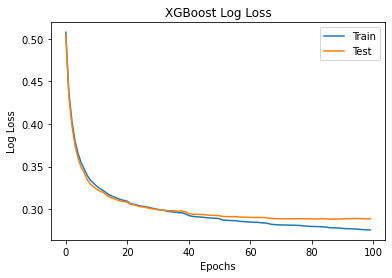

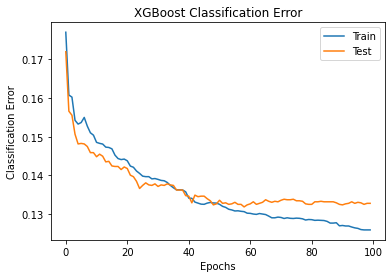

In [48]:
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

we are going to build model no 3

In [49]:
# hyper parameter tuning
params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200
}

In [50]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[23:48:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-error:0.09522	validation_0-logloss:0.68633	validation_1-error:0.17160	validation_1-logloss:0.68718
[1]	validation_0-error:0.09381	validation_0-logloss:0.67968	validation_1-error:0.17213	validation_1-logloss:0.68132
[2]	validation_0-error:0.09376	validation_0-logloss:0.67318	validation_1-error:0.16894	validation_1-logloss:0.67557
[3]	validation_0-error:0.09244	validation_0-logloss:0.66677	validation_1-error:0.16709	validation_1-logloss:0.66994
[4]	validation_0-error:0.09230	validation_0-logloss:0.66049	validation_1-error:0.16603	validation_1-logloss:0.66442
[5]	validation_0-error:0.09213	validation_0-logloss:0.65434	validation_1-error:0.16483	validation_1-logloss:0.65899
[6]	validation_0-error:0.09217	validation_0-logloss:0.64827	validation_1-error:0.16404	validation_1-logloss:

[69]	validation_0-error:0.07825	validation_0-logloss:0.40777	validation_1-error:0.15210	validation_1-logloss:0.45085
[70]	validation_0-error:0.07820	validation_0-logloss:0.40535	validation_1-error:0.15210	validation_1-logloss:0.44905
[71]	validation_0-error:0.07772	validation_0-logloss:0.40296	validation_1-error:0.15144	validation_1-logloss:0.44722
[72]	validation_0-error:0.07767	validation_0-logloss:0.40061	validation_1-error:0.15170	validation_1-logloss:0.44543
[73]	validation_0-error:0.07763	validation_0-logloss:0.39830	validation_1-error:0.15157	validation_1-logloss:0.44362
[74]	validation_0-error:0.07758	validation_0-logloss:0.39603	validation_1-error:0.15157	validation_1-logloss:0.44186
[75]	validation_0-error:0.07749	validation_0-logloss:0.39379	validation_1-error:0.15131	validation_1-logloss:0.44014
[76]	validation_0-error:0.07741	validation_0-logloss:0.39157	validation_1-error:0.15170	validation_1-logloss:0.43842
[77]	validation_0-error:0.07736	validation_0-logloss:0.38935	val

[139]	validation_0-error:0.06892	validation_0-logloss:0.28934	validation_1-error:0.14971	validation_1-logloss:0.36506
[140]	validation_0-error:0.06883	validation_0-logloss:0.28821	validation_1-error:0.14985	validation_1-logloss:0.36432
[141]	validation_0-error:0.06870	validation_0-logloss:0.28702	validation_1-error:0.14998	validation_1-logloss:0.36356
[142]	validation_0-error:0.06879	validation_0-logloss:0.28588	validation_1-error:0.14971	validation_1-logloss:0.36282
[143]	validation_0-error:0.06870	validation_0-logloss:0.28475	validation_1-error:0.15025	validation_1-logloss:0.36208
[144]	validation_0-error:0.06839	validation_0-logloss:0.28365	validation_1-error:0.15011	validation_1-logloss:0.36140
[145]	validation_0-error:0.06839	validation_0-logloss:0.28249	validation_1-error:0.14998	validation_1-logloss:0.36067
[146]	validation_0-error:0.06821	validation_0-logloss:0.28139	validation_1-error:0.14971	validation_1-logloss:0.35998
[147]	validation_0-error:0.06808	validation_0-logloss:0.

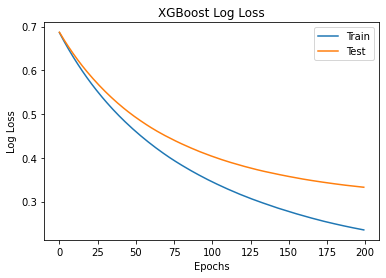

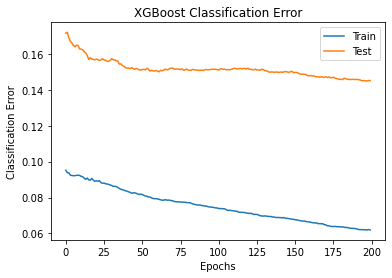

In [51]:
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

by oberving these model, we can say that we can improve accuracy by adjusting parameters

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(x_train, label = y_t1)
dtest = xgb.DMatrix(x_test, label = y_t2)

In [54]:
#creating watchlist of training to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [55]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}


In [56]:
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100  

In [57]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)


[23:48:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.90660	eval-auc:0.89886
[1]	train-auc:0.91993	eval-auc:0.90949
[2]	train-auc:0.92543	eval-auc:0.91238
[3]	train-auc:0.92961	eval-auc:0.91503
[4]	train-auc:0.93367	eval-auc:0.91965
[5]	train-auc:0.93812	eval-auc:0.91951
[6]	train-auc:0.94142	eval-auc:0.92020
[7]	train-auc:0.94321	eval-auc:0.91955
[8]	train-auc:0.94536	eval-auc:0.91909
[9]	train-auc:0.94620	eval-auc:0.91843
[10]	train-auc:0.94898	eval-auc:0.91731
[11]	train-auc:0.95124	eval-auc:0.91580
[12]	train-auc:0.95283	eval-auc:0.91465
[13]	train-auc:0.95416	eval-auc:0.91410
[14]	train-auc:0.95536	eval-auc:0.91445
[15]	train-auc:0.95602	eval-auc:0.91457
[16]	train-auc:0.95664	eval-auc:0.91463
[17]	train-auc:0.95701	eval-auc:0.91475
[18]	train-auc:0.95742	eval-auc:0.91474
[19]	train-auc:0.95945	eval-auc:0.91379
[20]	train-auc

we have found that we got training accuracy is **94%** and testing accuracy is **91%**

In [58]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)


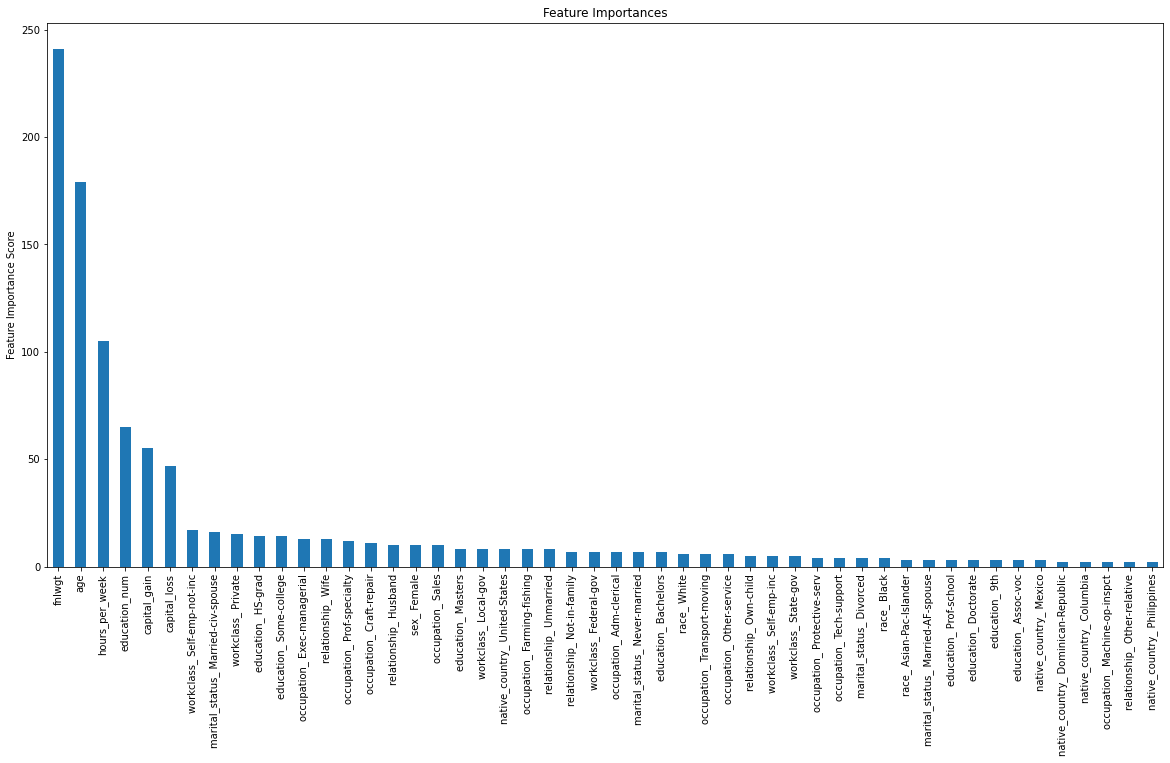

In [59]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()